### **Importing Libraries & Reading data**

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ( accuracy_score, mean_squared_error, confusion_matrix, precision_score, recall_score, 
                    f1_score, roc_auc_score )
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

In [3]:
data=pd.read_csv('Breast_Cancer(Wisconsin).csv')

In [4]:
df=data
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### **EDA and Feature Engineering**

In [5]:
df.drop(['Unnamed: 32','id'], axis = 1, inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [7]:
df["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [8]:
df["diagnosis"] = df["diagnosis"].map({'M': 1, 'B': 0})

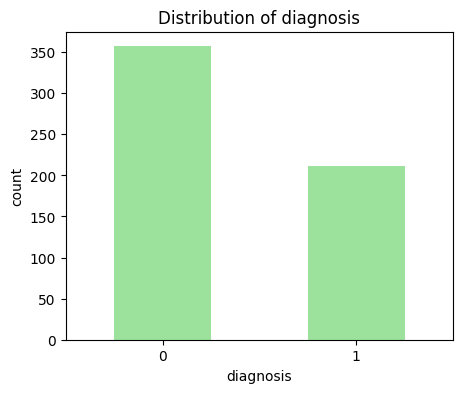

In [9]:
plt.figure(figsize=(5, 4))
sns.countplot(x = df['diagnosis'],color='lightgreen',width=0.5)
plt.title('Distribution of diagnosis')
plt.show()

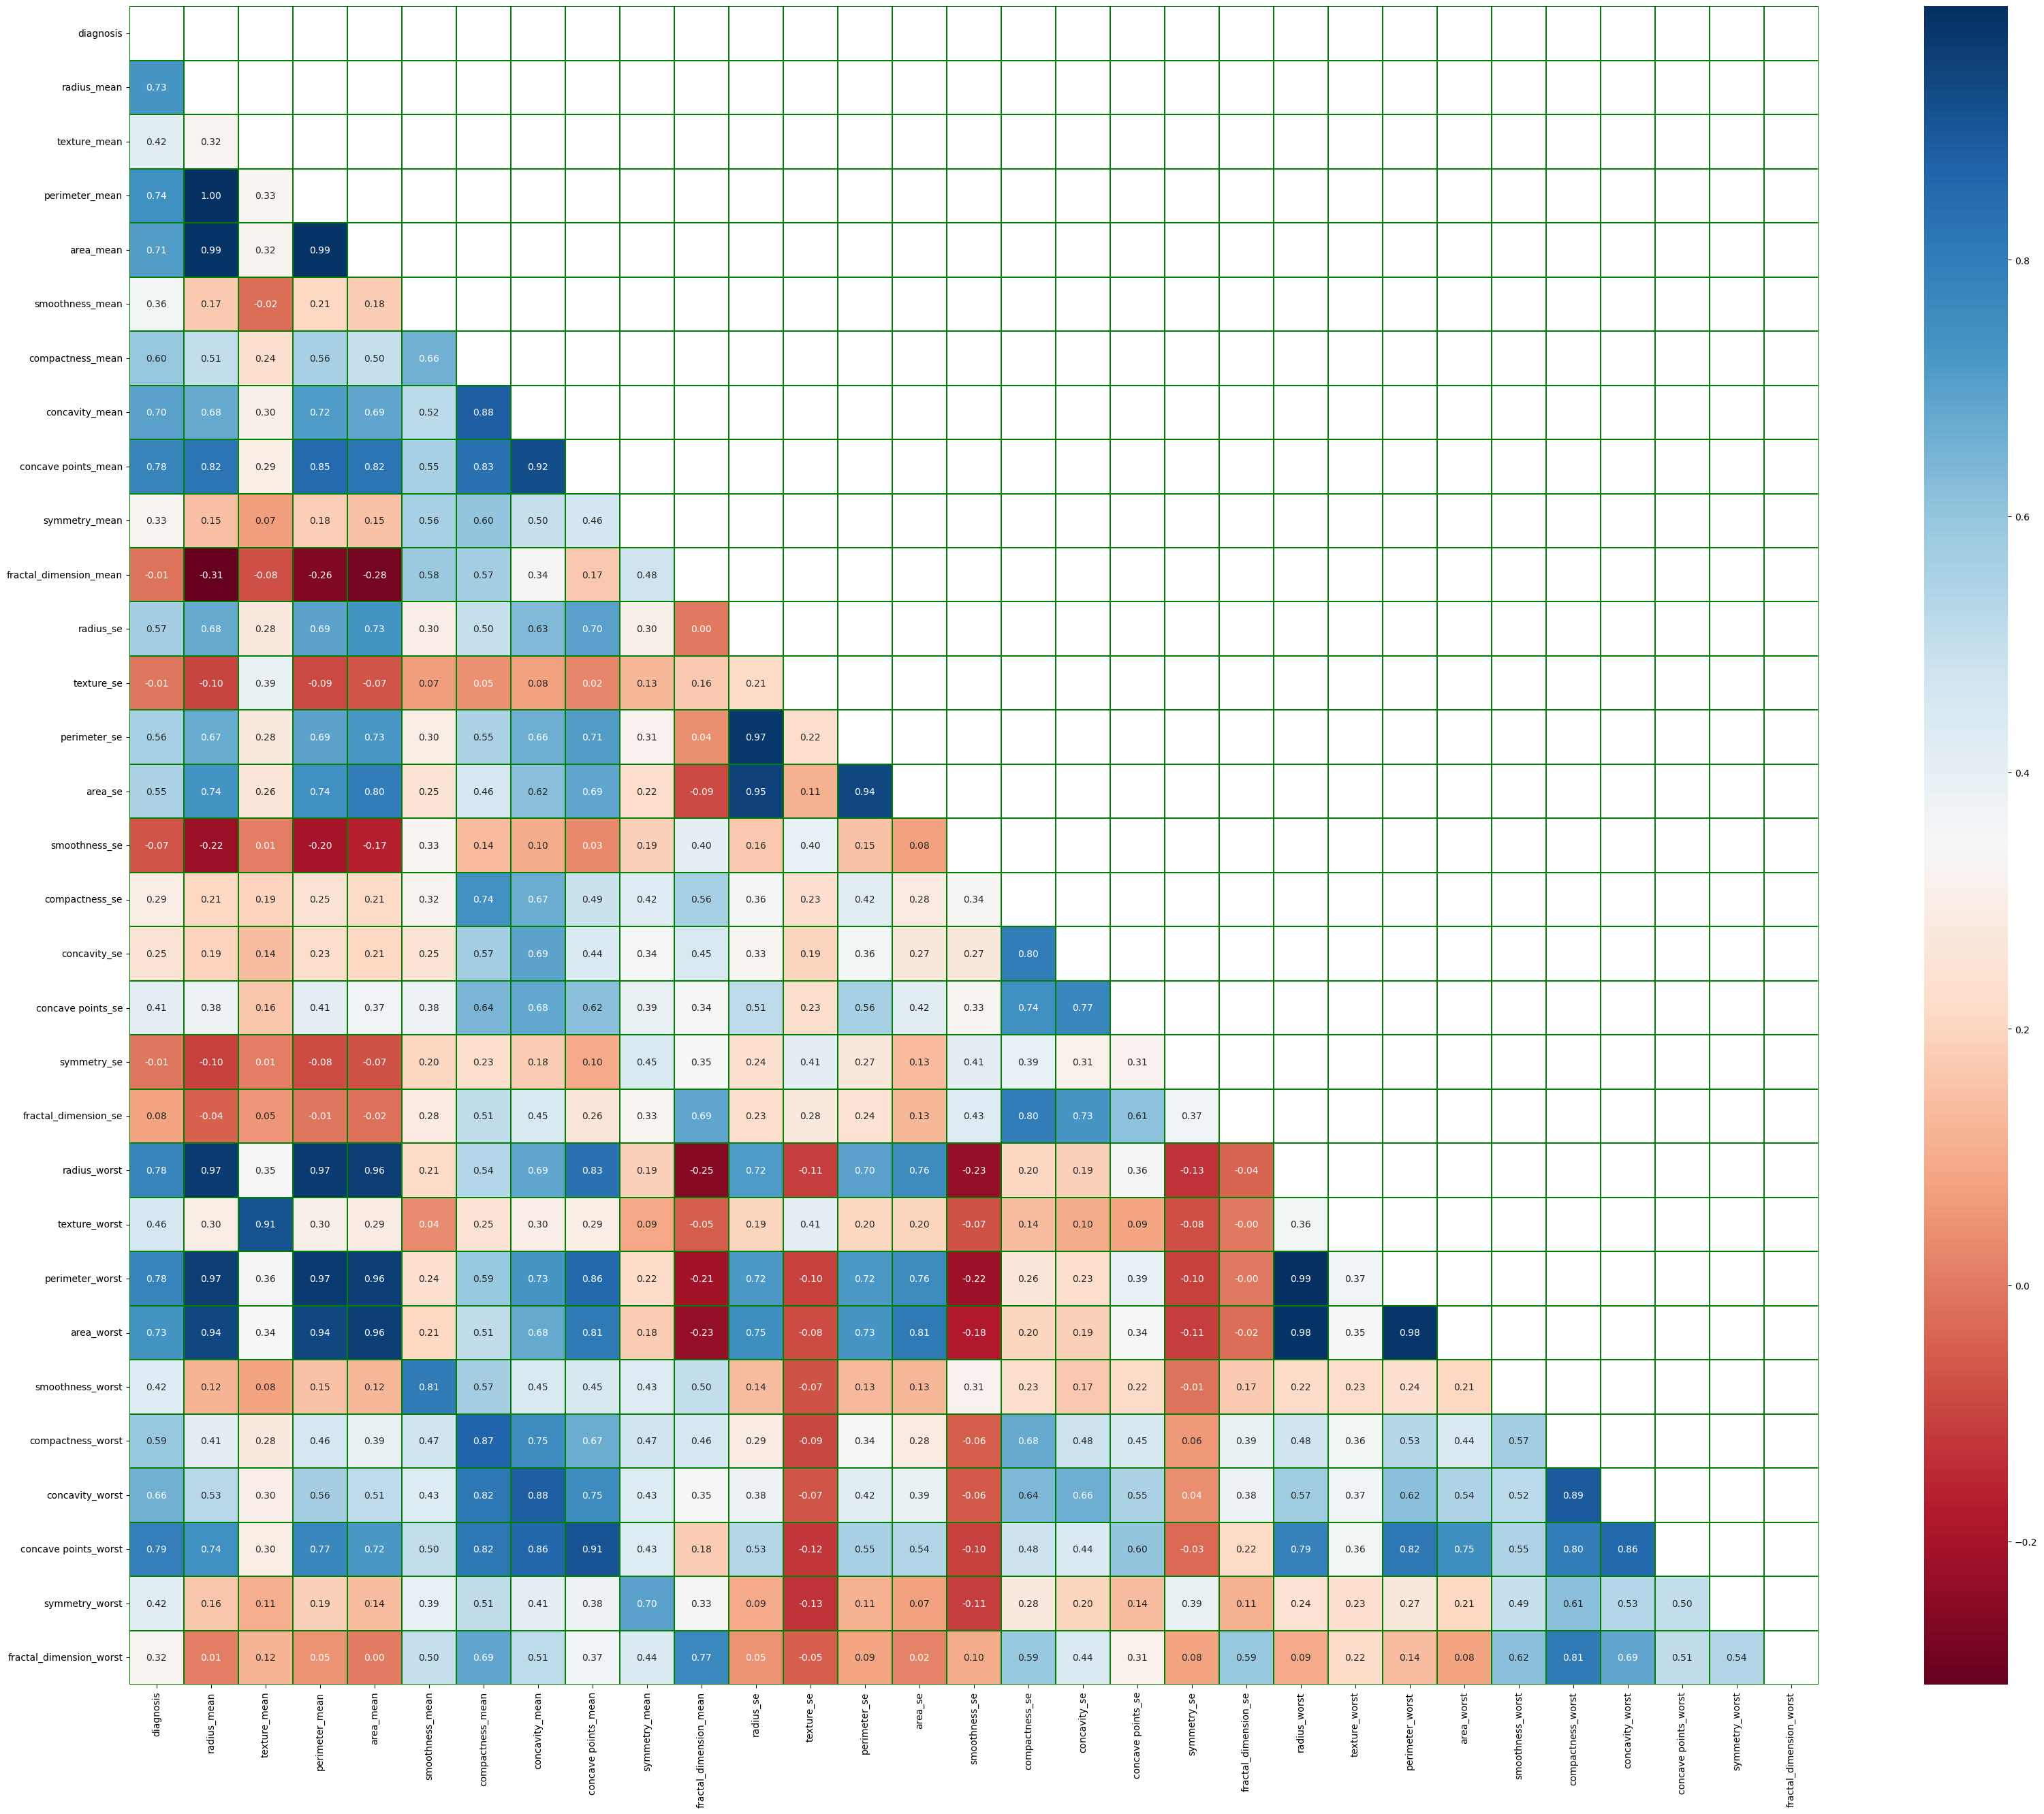

In [10]:
cor = df.corr()
plt.figure(figsize=(40,32))
mask = np.triu(np.ones_like(cor, dtype=bool))
sns.heatmap(cor, annot=True, fmt=".2f", mask=mask,linewidths=0.2,linecolor='green',cmap='RdBu')
plt.show()

In [11]:
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [12]:
X.shape

(569, 30)

### **Splitting & Preprocessing of the data**

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

### **Model Training and Evaluation**

In [53]:
def model_tr_eval(clf):
    model = clf
    if model == 'log_reg' or model == 'naive_bayes':
        model.fit(X_train_sc, y_train)
    else:
        model.fit(X_train, y_train)
    #training
    y_pred_tr = model.predict(X_train)
    print(f'Model training accuarcy : {accuracy_score(y_train,y_pred_tr):.3f}')
    #testing
    y_pred = model.predict(X_test)
    print(f'Model testing accuarcy : {accuracy_score(y_test,y_pred):.3f}')
    #label to use in evaluation
    lbl = ['M','B']
    #evaluating scores
    print(f'Precision : {precision_score(y_train,y_pred_tr):.3f}')
    print(f'Recall : {recall_score(y_train,y_pred_tr):.3f}')
    print(f'F1 score : {f1_score(y_train,y_pred_tr):.3f}')
    print(f'Roc_auc score : {roc_auc_score(y_train,y_pred_tr):.3f}')

    #report and confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(1,2,figsize=(8,4))
    sns.heatmap(cm, annot=True, cmap='YlGnBu', linewidths=1, xticklabels=lbl, 
                yticklabels=lbl, square=True, cbar_kws={'shrink': 0.8} ,ax=ax[0])
    ax[0].set_title('Confusion Matrix')

    #error plot 
    sns.kdeplot(y_test - y_pred, ax=ax[1])
    ax[1].set_title('Error Distribution')

    plt.tight_layout()
    plt.show()

Model training accuarcy : 0.941
Model testing accuarcy : 0.947
Precision : 0.980
Recall : 0.858
F1 score : 0.915
Roc_auc score : 0.924


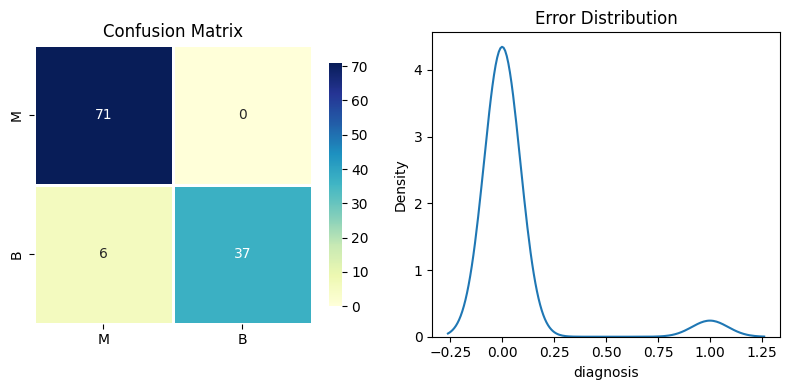

In [54]:
knn_classifier = KNeighborsClassifier(n_neighbors=4)
model_tr_eval(knn_classifier)

c:\ProgramData\Anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model training accuarcy : 0.956
Model testing accuarcy : 0.965
Precision : 0.952
Recall : 0.929
F1 score : 0.940
Roc_auc score : 0.951


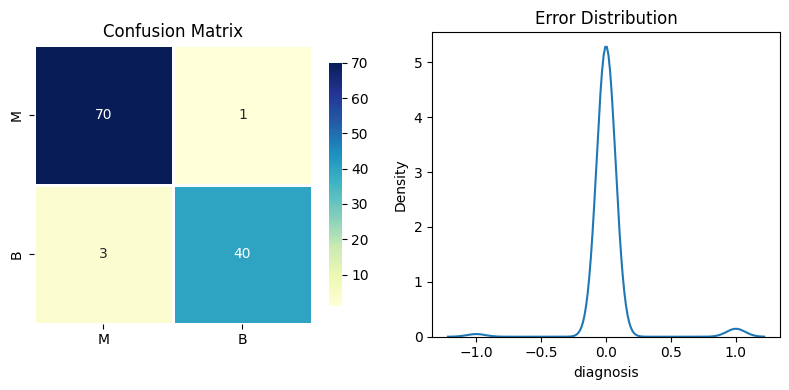

In [55]:
log_reg = LogisticRegression()
model_tr_eval(log_reg)

Model training accuarcy : 0.936
Model testing accuarcy : 0.974
Precision : 0.943
Recall : 0.882
F1 score : 0.911
Roc_auc score : 0.925


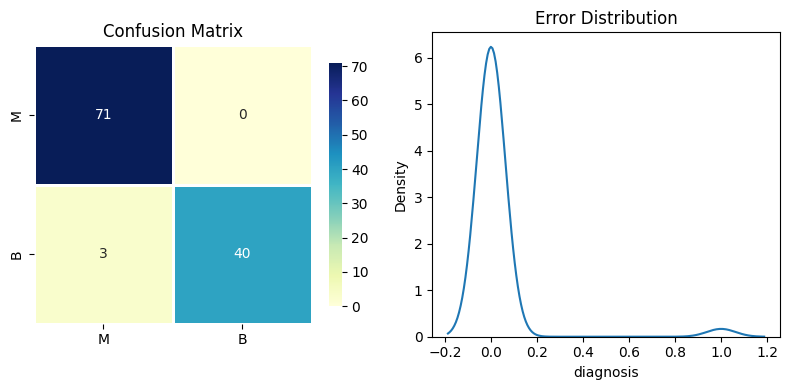

In [56]:
naive_bayes =  GaussianNB()
model_tr_eval(naive_bayes)

Model training accuarcy : 0.967
Model testing accuarcy : 0.956
Precision : 0.970
Recall : 0.941
F1 score : 0.955
Roc_auc score : 0.962


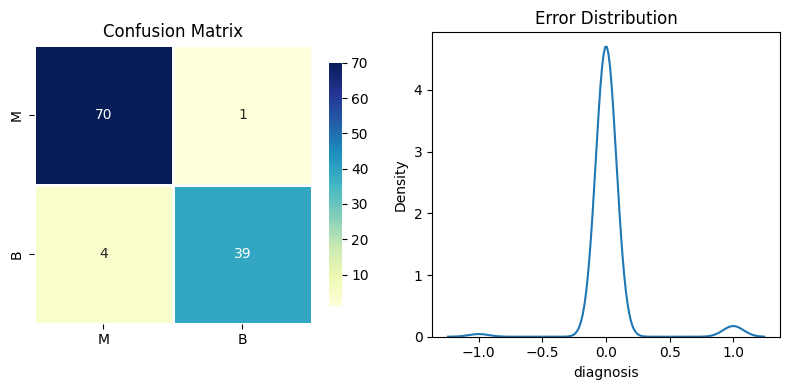

In [58]:
rf = RandomForestClassifier(n_estimators=10, max_depth=3)
model_tr_eval(rf)

### **Making the Prediction System**

In [39]:
data = (12.45,15.7,82.57,477.1,0.1278,0.17,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.00751,0.03345,0.03672,
        0.01137,0.02165,0.005082,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.1244)
data_reshaped_arr = np.asarray(data).reshape(1,-1)
pre_data = scaler.transform(data_reshaped_arr)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
if pred[0] == 1:
    print('Malignant')
else:
    print('Bengine')

Bengine


C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### **Saving the model and preprocessor**

In [59]:
import joblib 
joblib.dump(naive_bayes, 'nb.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [60]:
X_train.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')